In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [32]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [33]:
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.nn.functional as F
import torch.optim.lr_scheduler as lr_scheduler
from torchvision import transforms, utils, models
from torch.utils.data import Dataset, DataLoader

In [34]:
from synthetic_utils import *

In [35]:
from trainer import *
from networks import *
from losses import *

In [36]:
if torch.cuda.is_available():
    device="cuda"
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
else:
    device="cpu"
    torch.set_default_tensor_type('torch.FloatTensor')
print(device)

cuda


In [7]:
DATA_PATH = 'generated_data.pkl'
TRAIN_PATH = 'gen_train.pkl'
VAL_PATH = 'gen_val.pkl'
TEST_PATH = 'gen_test.pkl'

In [8]:
with open(TRAIN_PATH, 'rb') as f:
    imgs_train, shapes_train, colors_train = pickle.load(f)

In [9]:
with open(VAL_PATH, 'rb') as f:
    imgs_val, shapes_val, colors_val = pickle.load(f)

In [10]:
with open(TEST_PATH, 'rb') as f:
    imgs_test, shapes_test, colors_test = pickle.load(f)

In [11]:
imgs_train.shape, imgs_val.shape, imgs_test.shape, shapes_train.shape, shapes_val.shape, shapes_test.shape, colors_train.shape, colors_val.shape, colors_test.shape

((40000, 96, 96, 3),
 (5000, 96, 96, 3),
 (5000, 96, 96, 3),
 (40000, 1),
 (5000, 1),
 (5000, 1),
 (40000, 1),
 (5000, 1),
 (5000, 1))

In [12]:
imgs_train = imgs_train[:5000]
colors_train = colors_train[:5000]
shapes_train = shapes_train[:5000]

imgs_val = imgs_val[:500]
colors_val = colors_val[:500]
shapes_val = shapes_val[:500]

In [13]:
shapes_train = shapes_train.squeeze()
shapes_val = shapes_val.squeeze()
shapes_test = shapes_test.squeeze()
colors_train = colors_train.squeeze()
colors_val = colors_val.squeeze()
colors_test = colors_test.squeeze()

## Train only encoder first

In [14]:
encoder = LeNet()
classifier = ClassNet()

In [15]:
criterion = nn.BCELoss()
opt_cls = optim.Adam(classifier.parameters(), lr=0.001, betas=(0.9, 0.999))
opt_enc = optim.Adam(encoder.parameters(), lr=0.001, betas=(0.9, 0.999))

In [16]:
num_epochs = 100
train_losses = []
train_accs = []
val_losses = []
val_accs = []
epoch_time = AverageMeter()
ep_end = time.time()
for epoch in range(0, num_epochs):
        print('Epoch: {}/{}'.format(epoch, num_epochs))
#         scheduler_cls.step()
#         scheduler_enc.step()
        # train
        train_loss, train_acc = train_encoder_classifier_epoch(encoder,
                                classifier, imgs_train, shapes_train, opt_enc,
                                opt_cls, criterion, device)
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        # validate
        print('-'*10)
        val_loss, val_acc = validate_encoder_classifier_epoch(encoder, classifier,
                                imgs_val, shapes_val, criterion, device)

        print('Avg validation loss: {} \t Accuracy: {}'.format(val_loss, val_acc))
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        print('-' * 20)
        epoch_time.update(time.time() - ep_end)
        ep_end = time.time()
        print('Epoch {}/{}\t'
              'Time {epoch_time.val:.3f} sec ({epoch_time.avg:.3f} sec)'.format(epoch, num_epochs, epoch_time=epoch_time))
        print('-'*20)

Epoch: 0/100
Batch: [0/78]	Time 0.051 (0.051)	Loss 0.6866 (0.6866)	Accuracy 0.5625 (0.5625)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Batch: [30/78]	Time 0.033 (0.035)	Loss 0.6874 (0.7026)	Accuracy 0.5469 (0.5010)
Batch: [60/78]	Time 0.032 (0.034)	Loss 0.6706 (0.6962)	Accuracy 0.7500 (0.5079)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([52])) that is different to the input size (torch.Size([52, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


----------
Test: [0/7]	Time 0.006 (0.006)	Loss 0.4012 (0.4012)	Accuracy 0.8438 (0.8438)
Avg validation loss: 0.38202008414268496 	 Accuracy: 0.874
--------------------
Epoch 0/100	Time 2.717 sec (2.717 sec)
--------------------
Epoch: 1/100
Batch: [0/78]	Time 0.018 (0.018)	Loss 0.4135 (0.4135)	Accuracy 0.7969 (0.7969)
Batch: [30/78]	Time 0.032 (0.032)	Loss 0.1188 (0.3225)	Accuracy 0.9688 (0.8770)
Batch: [60/78]	Time 0.021 (0.031)	Loss 0.0089 (0.1990)	Accuracy 1.0000 (0.9252)
----------
Test: [0/7]	Time 0.004 (0.004)	Loss 0.0070 (0.0070)	Accuracy 1.0000 (1.0000)
Avg validation loss: 0.011811188004910945 	 Accuracy: 0.998
--------------------
Epoch 1/100	Time 2.590 sec (2.654 sec)
--------------------
Epoch: 2/100
Batch: [0/78]	Time 0.023 (0.023)	Loss 0.0070 (0.0070)	Accuracy 1.0000 (1.0000)
Batch: [30/78]	Time 0.031 (0.032)	Loss 0.0015 (0.0064)	Accuracy 1.0000 (0.9990)
Batch: [60/78]	Time 0.034 (0.032)	Loss 0.0007 (0.0047)	Accuracy 1.0000 (0.9992)
----------
Test: [0/7]	Time 0.004 (0.00

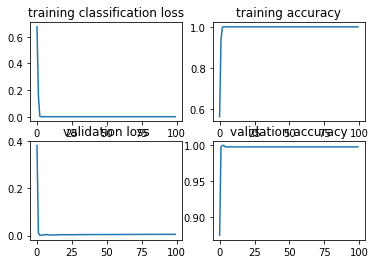

In [17]:
plt.subplot(221)
plt.title('training classification loss')
plt.plot(train_losses)
plt.subplot(222)
plt.title('training accuracy')
plt.plot(train_accs)
plt.subplot(223)
plt.title('validation loss')
plt.plot(val_losses)
plt.subplot(224)
plt.title('validation accuracy')
plt.plot(val_accs)

## Train only adversary

In [18]:
adv_encoder = LeNet()
adversary = ClassNet()

In [19]:
adv_criterion = nn.BCELoss()
opt_adv = optim.Adam(adversary.parameters(), lr=0.001, betas=(0.9, 0.999))
opt_adv_enc = optim.Adam(adv_encoder.parameters(), lr=0.001, betas=(0.9, 0.999))

In [20]:
num_epochs = 100
train_losses = []
train_accs = []
val_losses = []
val_accs = []
epoch_time = AverageMeter()
ep_end = time.time()
for epoch in range(0, num_epochs):
        print('Epoch: {}/{}'.format(epoch, num_epochs))
#         scheduler_cls.step()
#         scheduler_enc.step()
        # train
        train_loss, train_acc = train_encoder_classifier_epoch(adv_encoder,
                                adversary, imgs_train, colors_train, opt_adv_enc,
                                opt_adv, adv_criterion, device)
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        # validate
        print('-'*10)
        val_loss, val_acc = validate_encoder_classifier_epoch(adv_encoder, adversary,
                                imgs_val, colors_val, adv_criterion, device)

        print('Avg validation loss: {} \t Accuracy: {}'.format(val_loss, val_acc))
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        print('-' * 20)
        epoch_time.update(time.time() - ep_end)
        ep_end = time.time()
        print('Epoch {}/{}\t'
              'Time {epoch_time.val:.3f} sec ({epoch_time.avg:.3f} sec)'.format(epoch, num_epochs, epoch_time=epoch_time))
        print('-'*20)

Epoch: 0/100
Batch: [0/78]	Time 0.011 (0.011)	Loss 0.6930 (0.6930)	Accuracy 0.5156 (0.5156)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Batch: [30/78]	Time 0.033 (0.032)	Loss 0.3090 (0.3182)	Accuracy 0.9375 (0.8352)
Batch: [60/78]	Time 0.031 (0.032)	Loss 0.0089 (0.1648)	Accuracy 1.0000 (0.9152)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([52])) that is different to the input size (torch.Size([52, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


----------
Test: [0/7]	Time 0.008 (0.008)	Loss 0.0001 (0.0001)	Accuracy 1.0000 (1.0000)
Avg validation loss: 0.0006411310122621216 	 Accuracy: 1.0
--------------------
Epoch 0/100	Time 2.620 sec (2.620 sec)
--------------------
Epoch: 1/100
Batch: [0/78]	Time 0.011 (0.011)	Loss 0.0007 (0.0007)	Accuracy 1.0000 (1.0000)
Batch: [30/78]	Time 0.031 (0.031)	Loss 0.0000 (0.0001)	Accuracy 1.0000 (1.0000)
Batch: [60/78]	Time 0.031 (0.032)	Loss 0.0032 (0.0001)	Accuracy 1.0000 (1.0000)
----------
Test: [0/7]	Time 0.005 (0.005)	Loss 0.0000 (0.0000)	Accuracy 1.0000 (1.0000)
Avg validation loss: 6.8481022335618036e-06 	 Accuracy: 1.0
--------------------
Epoch 1/100	Time 2.576 sec (2.598 sec)
--------------------
Epoch: 2/100
Batch: [0/78]	Time 0.011 (0.011)	Loss 0.0000 (0.0000)	Accuracy 1.0000 (1.0000)
Batch: [30/78]	Time 0.026 (0.031)	Loss 0.0000 (0.0000)	Accuracy 1.0000 (1.0000)
Batch: [60/78]	Time 0.028 (0.032)	Loss 0.0000 (0.0000)	Accuracy 1.0000 (1.0000)
----------
Test: [0/7]	Time 0.006 (0.00

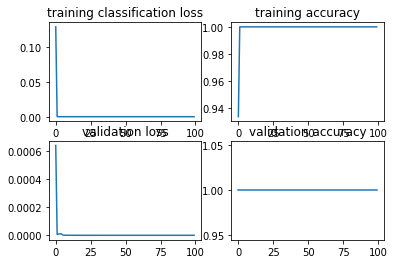

In [21]:
plt.subplot(221)
plt.title('training classification loss')
plt.plot(train_losses)
plt.subplot(222)
plt.title('training accuracy')
plt.plot(train_accs)
plt.subplot(223)
plt.title('validation loss')
plt.plot(val_losses)
plt.subplot(224)
plt.title('validation accuracy')
plt.plot(val_accs)

## Train adversary on original encoder

## LAFTR Training

In [37]:
laftr_encoder = LeNet()
laftr_adversary = ClassNet()
laftr_classifier = ClassNet()

In [38]:
laftr_adv_criterion = AdvDemographicParityLoss()
laftr_cls_criterion = nn.BCELoss()

In [39]:
laftr_opt_adv = optim.Adam(laftr_adversary.parameters(), lr=0.001, betas=(0.9, 0.999))
laftr_opt_cls = optim.Adam(laftr_classifier.parameters(), lr=0.001, betas=(0.9, 0.999))
laftr_opt_enc = optim.Adam(laftr_encoder.parameters(), lr=0.001, betas=(0.9, 0.999))

In [40]:
num_epochs = 100

clsTrain_losses = []
clsTrain_accs = []
clsTrainCombined_losses = []
advTrain_losses = []
advTrain_accs = []
advTrainCombined_losses = []

combinedVal_losses = []
clsVal_losses = []
clsVal_accs = []
advVal_losses = []
advVal_accs = []

epoch_time = AverageMeter()

In [41]:
ep_end = time.time()
for epoch in range(0, num_epochs):
        print('Epoch: {}/{}'.format(epoch, num_epochs))
        
        cls_loss, cls_en_combinedLoss, cls_en_acc, adv_loss, adv_combinedLoss, adv_acc = laftr_epoch_dp(
                                                        laftr_encoder, laftr_classifier, laftr_adversary, imgs_train,
                                                        shapes_train, colors_train, laftr_opt_enc, laftr_opt_cls, laftr_opt_adv, 
                                                        laftr_cls_criterion, laftr_adv_criterion, device)
        
        clsTrain_losses.append(cls_loss)
        clsTrain_accs.append(cls_en_acc)
        clsTrainCombined_losses.append(cls_en_combinedLoss)
        advTrain_losses.append(adv_loss)
        advTrain_accs.append(adv_acc)
        advTrainCombined_losses.append(adv_combinedLoss)
        
        print('Classifier accuracy: {}\t Adversary Accuracy: {}'.format(cls_en_acc, adv_acc))
        # validate
        print('-'*10)
        
        combinedVal_loss, clsVal_loss, clsVal_acc, advVal_loss, advVal_acc = laftr_validate_dp(
                                                        laftr_encoder, laftr_classifier, laftr_adversary, imgs_val,
                                                        shapes_val, colors_val,laftr_cls_criterion, laftr_adv_criterion, device)
        
        combinedVal_losses.append(combinedVal_loss)
        clsVal_losses.append(clsVal_loss)
        clsVal_accs.append(clsVal_acc)
        advVal_losses.append(advVal_loss)
        advVal_accs.append(advVal_acc)
        
        print('Classifier validation acc: {:.4f} \t Adv validation acc: {:.4f}'.format(clsVal_acc, advVal_acc))
        
        print('-' * 20)
        epoch_time.update(time.time() - ep_end)
        ep_end = time.time()
        print('Epoch {}/{}\t'
              'Time {epoch_time.val:.3f} sec ({epoch_time.avg:.3f} sec)'.format(epoch, num_epochs, epoch_time=epoch_time))
        print('-'*20)

Epoch: 0/100
Batch: [0/78]	Time 0.028 (0.028)
Classifier loss 0.6988 (0.6988)	Adversary loss 0.0004 (0.0004)
Combined Loss during classifier step 0.6987 (0.6987)	Combined Loss during adversary step -0.6928 (-0.6928)
Classifier Accuracy 0.4375 (0.4375)	Adversary Accuracy 0.4844 (0.4844)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Batch: [20/78]	Time 0.028 (0.025)
Classifier loss 0.7349 (0.6958)	Adversary loss 0.0059 (0.0007)
Combined Loss during classifier step 0.7412 (0.6967)	Combined Loss during adversary step -0.7315 (-0.6929)
Classifier Accuracy 0.4219 (0.5104)	Adversary Accuracy 0.5000 (0.5164)
Batch: [40/78]	Time 0.023 (0.025)
Classifier loss 0.6938 (0.6955)	Adversary loss 0.0018 (0.0017)
Combined Loss during classifier step 0.6956 (0.6975)	Combined Loss during adversary step -0.6957 (-0.6947)
Classifier Accuracy 0.5000 (0.5122)	Adversary Accuracy 0.4062 (0.5069)
Batch: [60/78]	Time 0.023 (0.024)
Classifier loss 0.6939 (0.6950)	Adversary loss -0.0005 (0.0012)
Combined Loss during classifier step 0.6934 (0.6964)	Combined Loss during adversary step -0.6934 (-0.6945)
Classifier Accuracy 0.4844 (0.5072)	Adversary Accuracy 0.3906 (0.4992)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([52])) that is different to the input size (torch.Size([52, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Classifier accuracy: 0.5076	 Adversary Accuracy: 0.5076
----------
Test batch: [0/7]	Time 0.006 (0.006)
Classifier loss 0.6934 (0.6934)	Adversary loss -0.0002 (-0.0002)
Combined Loss 0.6932 (0.6932)	Classifier Accuracy 0.5000 (0.5000)	Adversary Accuracy 0.5938 (0.5938)
Classifier validation acc: 0.4900 	 Adv validation acc: 0.5280
--------------------
Epoch 0/100	Time 1.957 sec (1.957 sec)
--------------------
Epoch: 1/100
Batch: [0/78]	Time 0.023 (0.023)
Classifier loss 0.6962 (0.6962)	Adversary loss -0.0001 (-0.0001)
Combined Loss during classifier step 0.6961 (0.6961)	Combined Loss during adversary step -0.6960 (-0.6960)
Classifier Accuracy 0.4375 (0.4375)	Adversary Accuracy 0.4844 (0.4844)
Batch: [20/78]	Time 0.023 (0.023)
Classifier loss 0.6921 (0.6939)	Adversary loss 0.0008 (0.0003)
Combined Loss during classifier step 0.6929 (0.6941)	Combined Loss during adversary step -0.6931 (-0.6940)
Classifier Accuracy 0.5781 (0.4851)	Adversary Accuracy 0.5000 (0.4985)
Batch: [40/78]	Time 0.

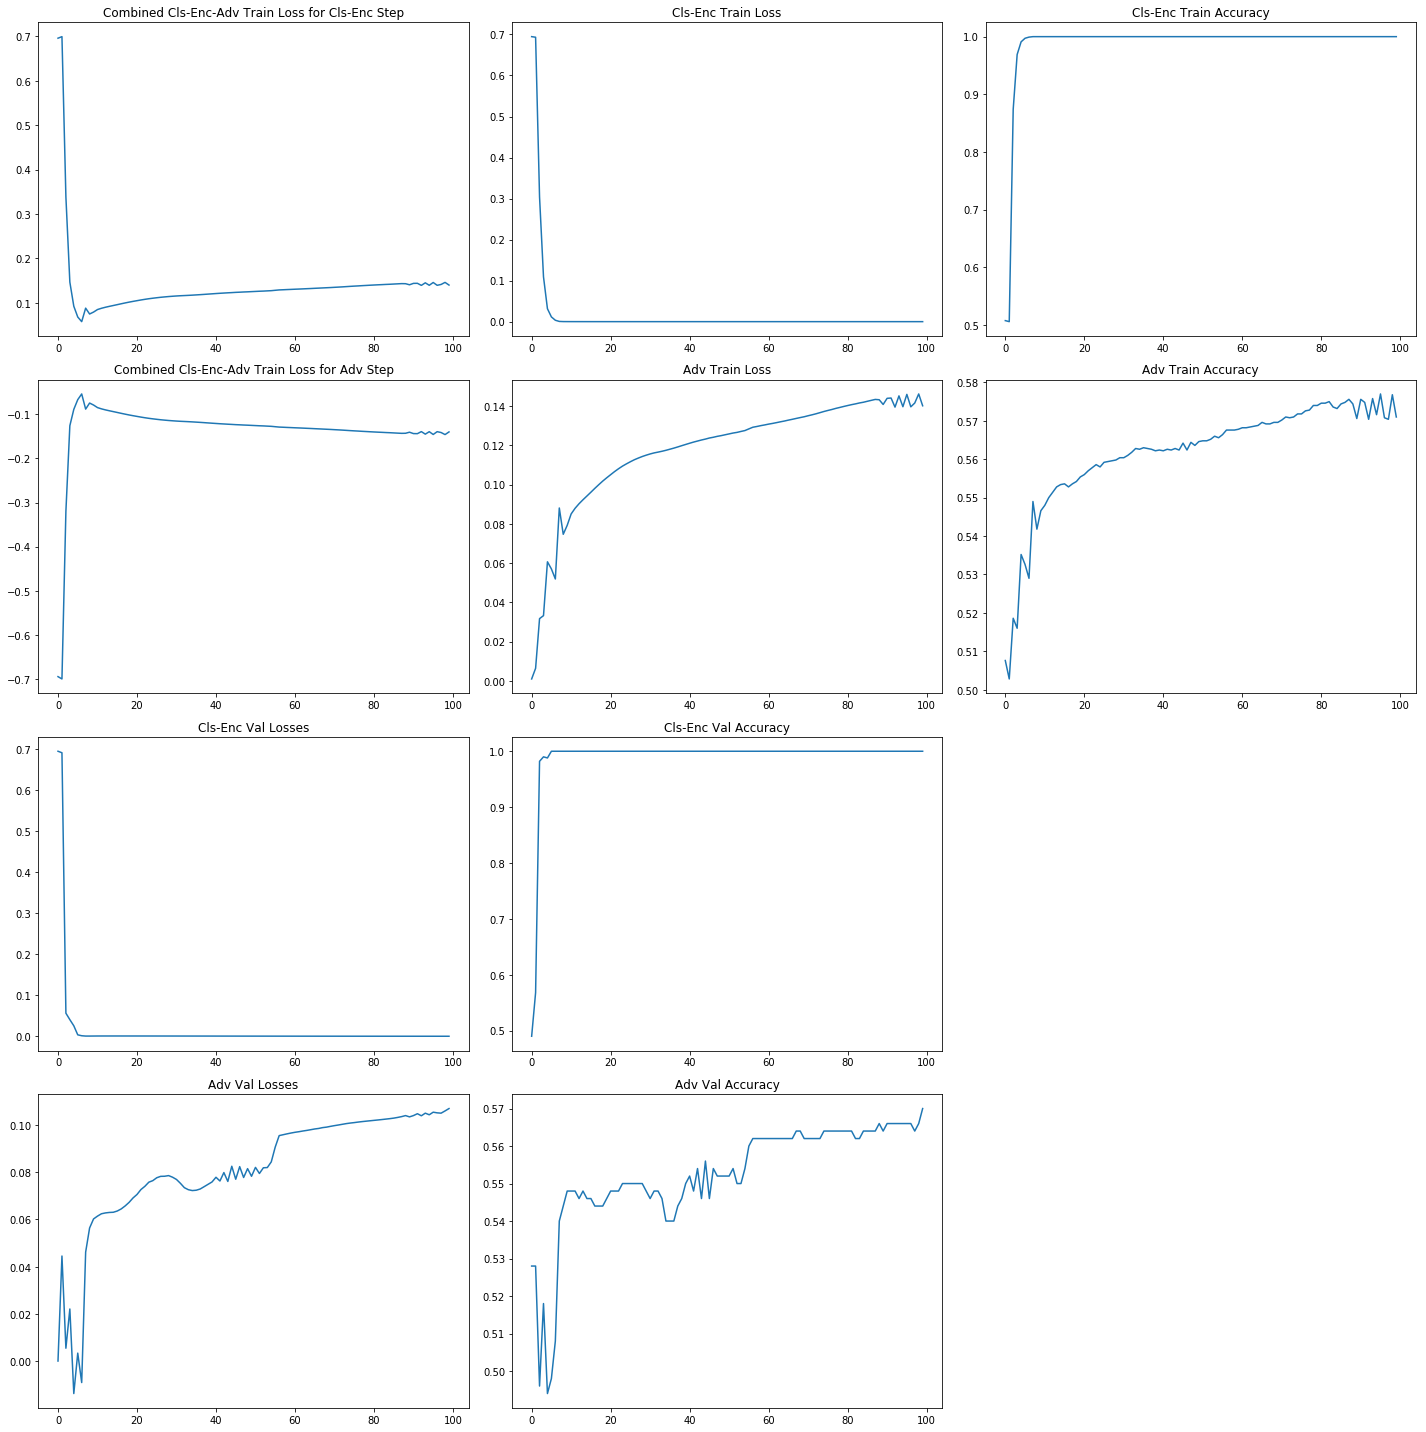

In [42]:
plt.figure(figsize=(20,20))
plt.subplot(431)
plt.title('Combined Cls-Enc-Adv Train Loss for Cls-Enc Step')
plt.plot(clsTrainCombined_losses)
plt.subplot(432)
plt.title('Cls-Enc Train Loss')
plt.plot(clsTrain_losses)
plt.subplot(433)
plt.title('Cls-Enc Train Accuracy')
plt.plot(clsTrain_accs)
plt.subplot(434)
plt.title('Combined Cls-Enc-Adv Train Loss for Adv Step')
plt.plot(advTrainCombined_losses)
plt.subplot(435)
plt.title('Adv Train Loss')
plt.plot(advTrain_losses)
plt.subplot(436)
plt.title('Adv Train Accuracy')
plt.plot(advTrain_accs)

plt.subplot(437)
plt.title('Cls-Enc Val Losses')
plt.plot(clsVal_losses)
plt.subplot(438)
plt.title('Cls-Enc Val Accuracy')
plt.plot(clsVal_accs)
plt.subplot(4,3,10)
plt.title('Adv Val Losses')
plt.plot(advVal_losses)
plt.subplot(4,3,11)
plt.title('Adv Val Accuracy')
plt.plot(advVal_accs)

plt.tight_layout()

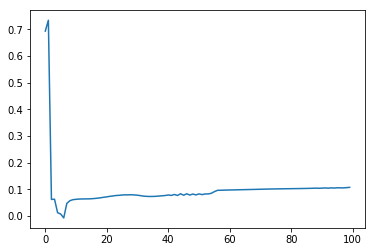

In [43]:
plt.plot(combinedVal_losses)